In [1]:
import os
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
import csv
import gzip
import anndata as ad
from pathlib import Path
import glob
import scvi
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.10.8
scanpy      1.10.3
-----
PIL                 10.4.0
absl                NA
asttokens           NA
attr                24.2.0
bottleneck          1.4.1
cffi                1.17.1
chex                0.1.87
comm                0.2.1
contextlib2         NA
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.6.7
decorator           5.1.1
distutils           3.12.7
docrep              0.3.2
etils               1.9.4
executing           0.8.3
filelock            3.16.1
flax                0.9.0
fsspec              2024.10.0
gmpy2               2.1.5
h5py                3.11.0
igraph              0.11.6
ipykernel           6.28.0
ipywidgets          8.1.3
jaraco              NA
jax                 0.4.34
jaxlib              0.4.34
jedi                0.18.1
joblib              1.4.2
kiwisolver          1.4.7
legacy_api_wrap     NA
leidenalg           0.10.2
lightning           2.4.0
lightning_utilities 0.11.7
llvmlit

In [2]:
outdir='/home/jing/Phd_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_publication'

In [3]:
adata= ad.read_h5ad(os.path.join(outdir,'gbm_OUTPUT_scvi.h5ad'))

In [4]:
adata

AnnData object with n_obs × n_vars = 56716 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden', 'Cellid'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2990', 'mean_counts-SF2990', 'pct_dropout_by_counts-SF2990', 'total_counts-SF2990', 'n_cells_by_counts-SF30

In [ ]:
metadata= pd.read_csv('/home/jing/Phd_project/project_GBM/gbm_DATA/gbm_DATA_metadata/GSE174554_Tumor_normal_metadata_11916v2.txt',
                      sep=' ')
metadata['Barcode'] = metadata['Barcode']+ '-1-'+metadata['Sample']
metadata.set_index('Barcode',inplace=True)
metadata

In [ ]:
for i in adata.obs.index:
    adata.obs.loc[i,'Tumor_Normal_annotation']=metadata.loc[i,'Tumor_Normal_annotation']

In [5]:
doublet_df = pd.read_csv(os.path.join(outdir,'doublet_predictions.csv'), index_col=0)
doublet_df

,Solo_Prediction
Index,
AAACCCAAGCGAACTG-1-SF9494,doublet
AAACCCAAGGCATTTC-1-SF9494,singlet
AAACCCAAGTACCGGA-1-SF9494,doublet
AAACCCATCATTCGGA-1-SF9494,singlet
AAACCCATCCTCTCGA-1-SF9494,singlet
...,...
TTTGTTGAGTACCATC-1-SF2777,singlet
TTTGTTGCACTGGCCA-1-SF2777,doublet
TTTGTTGGTACTCAAC-1-SF2777,doublet


In [6]:
for i in adata.obs.index:
    adata.obs.loc[i,'solo'] = doublet_df.loc[i,'Solo_Prediction']

In [7]:
adata.obs['solo'].value_counts()

solo
singlet    50738
doublet     5978
Name: count, dtype: int64

In [ ]:
adata_singlet = adata[adata.obs['solo']=='singlet']
adata_singlet

View of AnnData object with n_obs × n_vars = 50738 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden', 'Cellid', 'solo'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2990', 'mean_counts-SF2990', 'pct_dropout_by_counts-SF2990', 'total_counts-SF2990', 'n_cell

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:21)


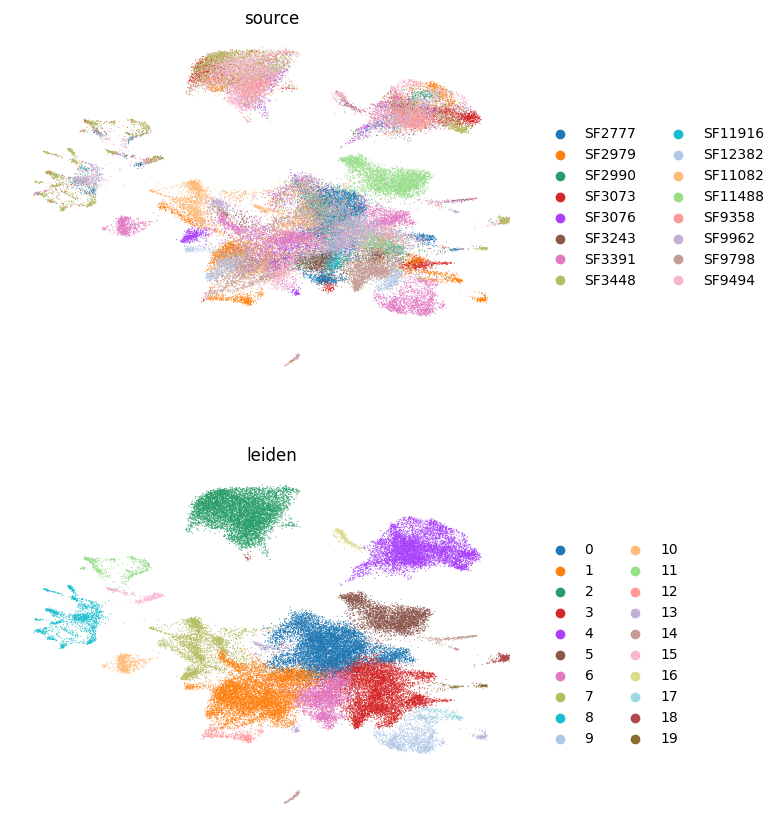

In [10]:
sc.tl.umap(adata, min_dist=0.5,random_state =0)
sc.pl.umap(
    adata,
    color=["source", "leiden"],
    frameon=False,
    ncols=1,
)

/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


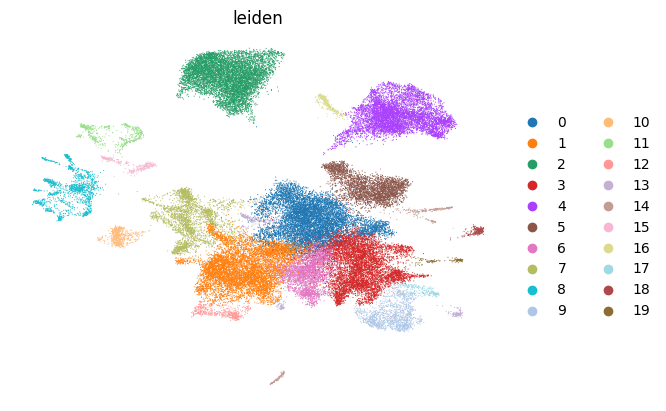

In [11]:
sc.pl.umap(
    adata_singlet,
    color=["leiden"],
    frameon=False,
    ncols=1,
)

In [12]:
adata_singlet

AnnData object with n_obs × n_vars = 50738 × 2000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'source', '_scvi_batch', '_scvi_labels', 'leiden', 'Cellid', 'solo'
    var: 'Gene', 'mt', 'n_cells_by_counts-SF11082', 'mean_counts-SF11082', 'pct_dropout_by_counts-SF11082', 'total_counts-SF11082', 'n_cells_by_counts-SF11488', 'mean_counts-SF11488', 'pct_dropout_by_counts-SF11488', 'total_counts-SF11488', 'n_cells_by_counts-SF11916', 'mean_counts-SF11916', 'pct_dropout_by_counts-SF11916', 'total_counts-SF11916', 'n_cells_by_counts-SF12382', 'mean_counts-SF12382', 'pct_dropout_by_counts-SF12382', 'total_counts-SF12382', 'n_cells_by_counts-SF2777', 'mean_counts-SF2777', 'pct_dropout_by_counts-SF2777', 'total_counts-SF2777', 'n_cells_by_counts-SF2979', 'mean_counts-SF2979', 'pct_dropout_by_counts-SF2979', 'total_counts-SF2979', 'n_cells_by_counts-SF2990', 'mean_counts-SF2990', 'pct_dropout_by_counts-SF2990', 'total_counts-SF2990', 'n_cells_by_cou

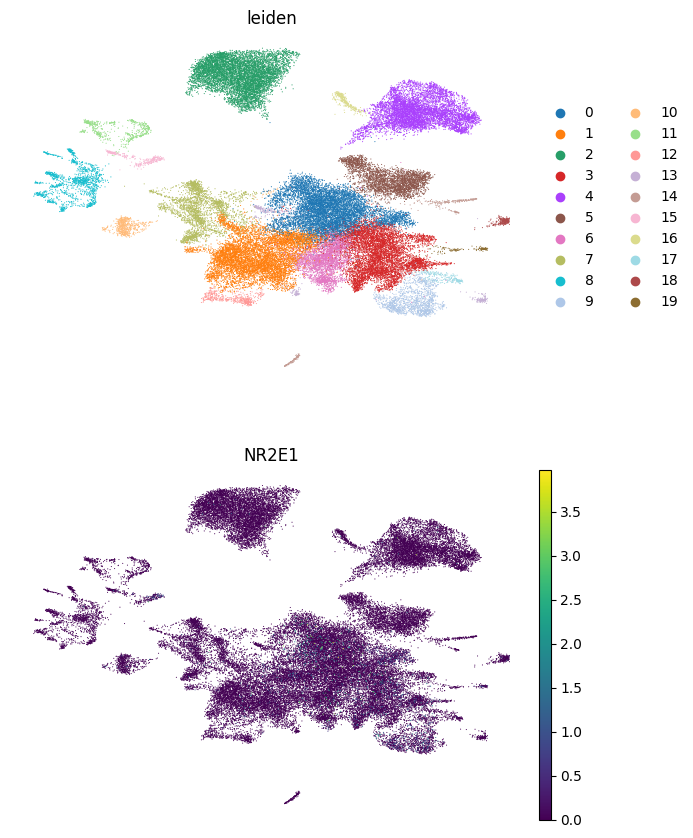

In [14]:
sc.pl.umap(
    adata_singlet,
    color=["leiden",'NR2E1'],
    frameon=False,
    ncols=1,
)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:19)


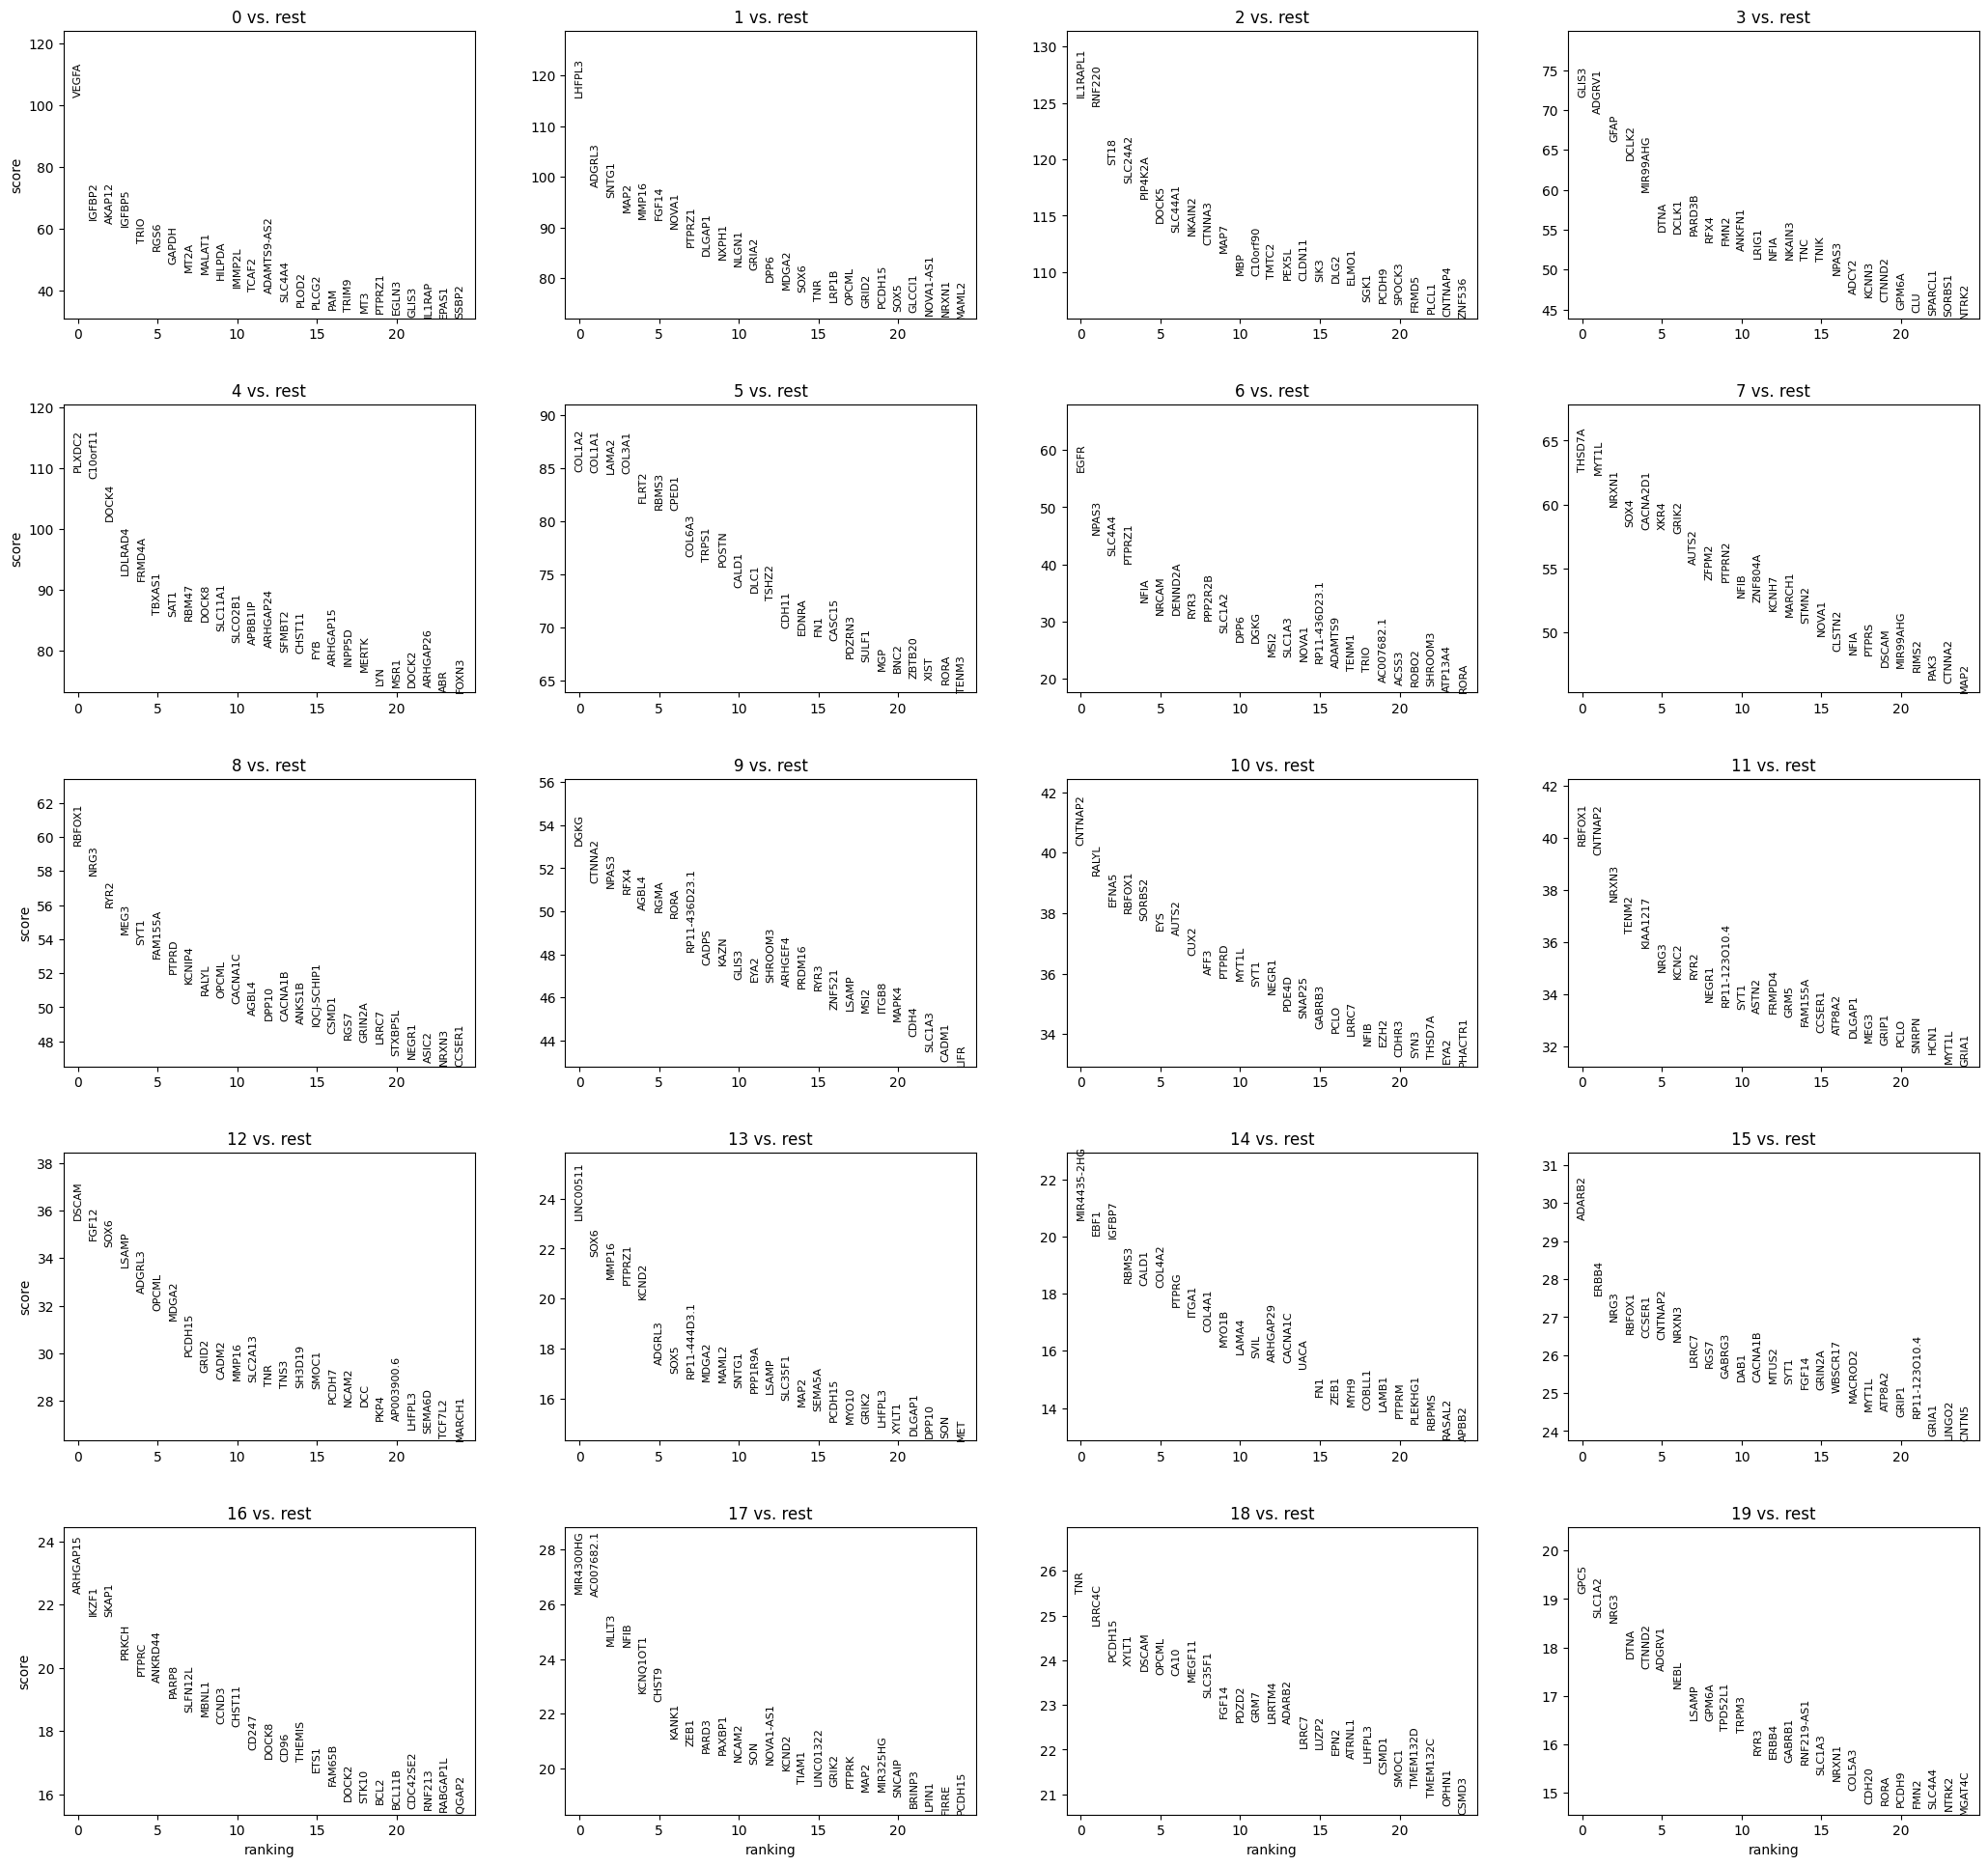

In [16]:
sc.tl.rank_genes_groups(adata_singlet, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata_singlet, n_genes=25, sharey=False)